# Loading data

In [15]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

In [13]:
def gen_labels(im_name, pat1, pat2):
    '''
    Parameters
    ----------
    im_name : Str
        The image file name.
    pat1 : Str
        A string pattern in the filename for 1st class, e.g "Mel"
    pat2 : Str
        A string pattern in the filename 2nd class, e.g, "Nev" 
    Returns
    -------
    Label : Numpy array        
        Class label of the filename name based on its pattern.
    '''
    if pat1 in im_name:
        label = np.array([0])
    elif pat2 in im_name:
        label = np.array([1])
    return label


def get_data(data_path, data_list, img_h, img_w):
    """
    Parameters
    ----------
    train_data_path : Str
        Path to the data directory
    train_list : List
        A list containing the name of the images.
    img_h : Int
        image height to be resized to.
    img_w : Int
        image width to be resized to.    
    Returns
    -------
    img_labels : Nested List
        A nested list containing the loaded images along with their
        correcponding labels.
    """
    img_labels = []       
    for item in enumerate(data_list):
        if 'Mel' in item[1]:
            folder = '/Mel/'
        else:
            folder = '/Nevi/'
        img = imread(os.path.join(data_path + folder, item[1]), as_gray = True) # "as_grey"
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        img_labels.append([np.array(img), gen_labels(item[1], 'Mel', 'Nev')]) 
        
        if item[0] % 100 == 0:
             print('Reading: {0}/{1}  of train images'.format(item[0], len(data_list)))
             
    shuffle(img_labels)
    return img_labels


def get_data_arrays(nested_list, img_h, img_w):
    """
    Parameters
    ----------
    nested_list : nested list
        nested list of image arrays with corresponding class labels.
    img_h : Int
        Image height.
    img_w : Int
        Image width.
    Returns
    -------
    img_arrays : Numpy array
        4D Array with the size of (n_data,img_h,img_w, 1)
    label_arrays : Numpy array
        1D array with the size (n_data).
    """
    img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
    label_arrays = np.zeros((len(nested_list)), dtype = np.int32)
    for ind in range(len(nested_list)):
        img_arrays[ind] = nested_list[ind][0]
        label_arrays[ind] = nested_list[ind][1]
    img_arrays = np.expand_dims(img_arrays, axis =3)
    return img_arrays, label_arrays


def get_train_test_arrays(train_data_path, test_data_path, train_list,
                          test_list, img_h, img_w):
    """
    Get the directory to the train and test sets, the files names and
    the size of the image and return the image and label arrays for
    train and test sets.
    """
    
    train_data = get_data(train_data_path, train_list, img_h, img_w)
    test_data = get_data(test_data_path, test_list, img_h, img_w)
    
    train_img, train_label =  get_data_arrays(train_data, img_h, img_w)
    test_img, test_label = get_data_arrays(test_data, img_h, img_w)
    del(train_data)
    del(test_data)      
    return train_img, test_img, train_label, test_label

In [14]:
img_w, img_h = 128, 128      # Setting the width and heights of the images.
data_path = '/DL_course_data/Lab2/Skin/'     # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')   
test_data_path = os.path.join(data_path, 'validation')
train_list = os.listdir(train_data_path+ '/Mel/') + os.listdir(train_data_path + '/Nevi/')
test_list = os.listdir(test_data_path + '/Mel/') + os.listdir(test_data_path + '/Nevi/')
x_train, x_test, y_train, y_test = get_train_test_arrays(
        train_data_path, test_data_path,
        train_list, test_list, img_h, img_w)

Reading: 0/1000  of train images
Reading: 100/1000  of train images
Reading: 200/1000  of train images
Reading: 300/1000  of train images
Reading: 400/1000  of train images
Reading: 500/1000  of train images
Reading: 600/1000  of train images
Reading: 700/1000  of train images
Reading: 800/1000  of train images
Reading: 900/1000  of train images
Reading: 0/200  of train images
Reading: 100/200  of train images


# Task 1A

#### _No dropout_

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, Dropout, BatchNormalization, SpatialDropout2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [35]:
def AlexNet(img_ch, img_width, img_height, n_base, dropout = False, batchnormal = False, spatialdrop = False):
    model = Sequential()
    
    model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),kernel_size=(3,3), strides=(1,1), padding='same'))
    if batchnormal :
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    if spatialdrop :
        model.add(SpatialDropout2D(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    if batchnormal :
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    if spatialdrop :
        model.add(SpatialDropout2D(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    if batchnormal :
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    if spatialdrop :
        model.add(SpatialDropout2D(0.1))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    if batchnormal :
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    if spatialdrop :
        model.add(SpatialDropout2D(0.1))
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    if batchnormal :
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    if spatialdrop :
        model.add(SpatialDropout2D(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    if dropout:
        model.add(Dropout(0.4))
    model.add(Dense(64))
    model.add(Activation('relu'))
    if dropout:
        model.add(Dropout(0.4))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model

In [20]:
img_w, img_h = 128, 128
base = 8
n_epochs = 50
batchsize = 8
LR = 0.0001

clf = AlexNet(1, img_w, img_h, base)
clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 8)       80        
_________________________________________________________________
activation_8 (Activation)    (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_9 (Activation)    (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)       

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3156 - binary_accuracy: 0.8740 - val_loss: 0.4633 - val_binary_accuracy: 0.8150
Epoch 34/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3078 - binary_accuracy: 0.8800 - val_loss: 0.4432 - val_binary_accuracy: 0.8150
Epoch 35/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2952 - binary_accuracy: 0.8770 - val_loss: 0.4751 - val_binary_accuracy: 0.8200
Epoch 36/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2898 - binary_accuracy: 0.8800 - val_loss: 0.4896 - val_binary_accuracy: 0.7850
Epoch 37/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3038 - binary_accuracy: 0.8740 - val_loss: 0.4984 - val_binary_accuracy: 0.7900
Epoch 38/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2880 - binary_accuracy: 0.8760 - val_loss: 0.5049 - val_binary_accuracy: 0.8250
Epoch 39/50
1000/1000 [=======================

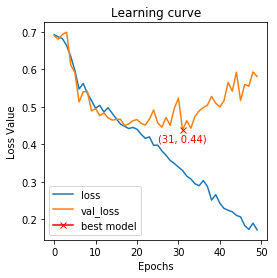

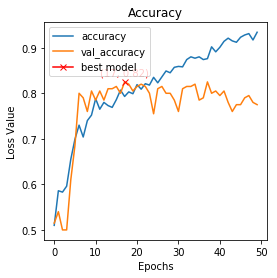

In [21]:
import matplotlib.pyplot as plt
#Loss
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
xmin = np.argmin(clf_hist.history["val_loss"])
ymin = np.min(clf_hist.history["val_loss"])
plt.plot( xmin, ymin, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
             horizontalalignment = "center", verticalalignment = "top", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('1A/learning_curve_loss.png', dpi = 200)

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('1A/learning_curve_accuracy.png', dpi = 200)

#### _With dropout_

In [22]:
img_w, img_h = 128, 128
base = 8
n_epochs = 50
batchsize = 8
LR = 0.0001

clf = AlexNet(1, img_w, img_h, base, dropout = True)
clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
activation_16 (Activation)   (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_17 (Activation)   (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)       

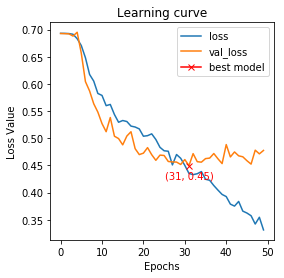

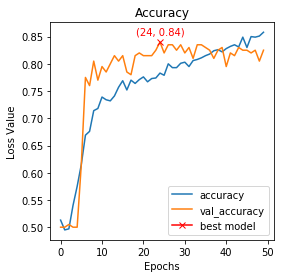

In [23]:
import matplotlib.pyplot as plt
#Loss
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
xmin = np.argmin(clf_hist.history["val_loss"])
ymin = np.min(clf_hist.history["val_loss"])
plt.plot( xmin, ymin, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
             horizontalalignment = "center", verticalalignment = "top", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('1A/loss_with_dropout.png', dpi = 200)

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('1A/acc_with_dropout.png', dpi = 200)

# Task 1B

#### _Without dropout_ 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
batch_normalization_v2_5 (Ba (None, 128, 128, 8)       32        
_________________________________________________________________
activation_32 (Activation)   (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
batch_normalization_v2_6 (Ba (None, 64, 64, 16)        64        
_________________________________________________________________
activation_33 (Activation)   (None, 64, 64, 16)       

Epoch 29/50
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.0215 - binary_accuracy: 0.9970 - val_loss: 0.8333 - val_binary_accuracy: 0.7850
Epoch 30/50
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.0445 - binary_accuracy: 0.9870 - val_loss: 0.8114 - val_binary_accuracy: 0.7750
Epoch 31/50
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.0202 - binary_accuracy: 0.9970 - val_loss: 0.8423 - val_binary_accuracy: 0.7550
Epoch 32/50
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.0154 - binary_accuracy: 0.9980 - val_loss: 0.8891 - val_binary_accuracy: 0.7950
Epoch 33/50
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.0333 - binary_accuracy: 0.9910 - val_loss: 0.8584 - val_binary_accuracy: 0.7750
Epoch 34/50
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.0100 - binary_accuracy: 1.0000 - val_loss: 0.8924 - val_binary_accuracy: 0.7850
Epoch 35/50
1000/1000 [===========

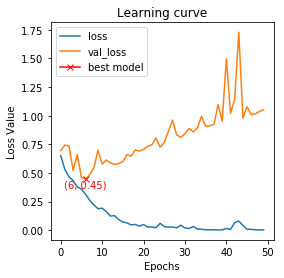

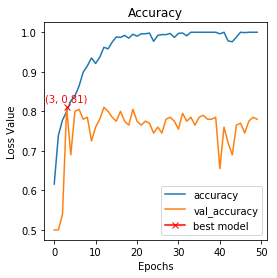

In [28]:
#Settings
img_w, img_h = 128, 128
base = 8
n_epochs = 50
batchsize = 8
LR = 0.0001

#Build the model
clf = AlexNet(1, img_w, img_h, base, dropout = False, batchnormal = True)
clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))

#Plots
#Loss
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
xmin = np.argmin(clf_hist.history["val_loss"])
ymin = np.min(clf_hist.history["val_loss"])
plt.plot( xmin, ymin, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
             horizontalalignment = "center", verticalalignment = "top", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('1B/loss_batchnorm.png', dpi = 200)

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('1B/acc_batchnorm.png', dpi = 200)

#### _With dropout_ 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
batch_normalization_v2 (Batc (None, 128, 128, 8)       32        
_________________________________________________________________
activation_24 (Activation)   (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 64, 64, 16)        64        
_________________________________________________________________
activation_25 (Activation)   (None, 64, 64, 16)       

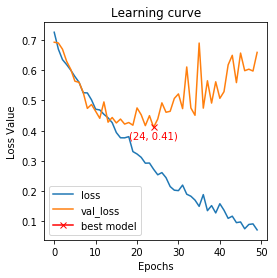

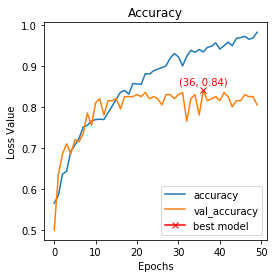

In [27]:
#Settings
img_w, img_h = 128, 128
base = 8
n_epochs = 50
batchsize = 8
LR = 0.0001

#Build the model
clf = AlexNet(1, img_w, img_h, base, dropout = True, batchnormal = True)
clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))

#Plots
#Loss
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
xmin = np.argmin(clf_hist.history["val_loss"])
ymin = np.min(clf_hist.history["val_loss"])
plt.plot( xmin, ymin, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
             horizontalalignment = "center", verticalalignment = "top", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('1B/loss_dropout_batchnorm.png', dpi = 200)

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('1B/acc_dropout_batchnorm.png', dpi = 200)

# Tak 1C

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
batch_normalization_v2_10 (B (None, 128, 128, 8)       32        
_________________________________________________________________
activation_40 (Activation)   (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
batch_normalization_v2_11 (B (None, 64, 64, 16)        64        
_________________________________________________________________
activation_41 (Activation)   (None, 64, 64, 16)       

Epoch 78/80
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3407 - binary_accuracy: 0.8640 - val_loss: 0.4866 - val_binary_accuracy: 0.8250
Epoch 79/80
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3451 - binary_accuracy: 0.8590 - val_loss: 0.4844 - val_binary_accuracy: 0.8000
Epoch 80/80
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3699 - binary_accuracy: 0.8380 - val_loss: 0.4813 - val_binary_accuracy: 0.8000
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
activation_48 (Activation)   (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 64, 64, 8)         0         
_________________________________

Epoch 79/80
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5314 - binary_accuracy: 0.7540 - val_loss: 0.5162 - val_binary_accuracy: 0.8150
Epoch 80/80
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5320 - binary_accuracy: 0.7590 - val_loss: 0.5063 - val_binary_accuracy: 0.8000


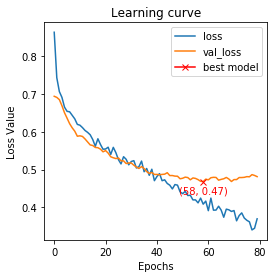

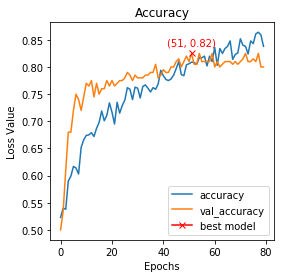

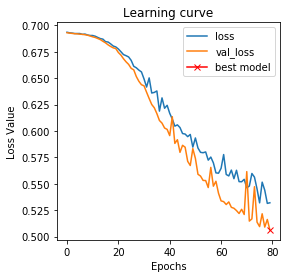

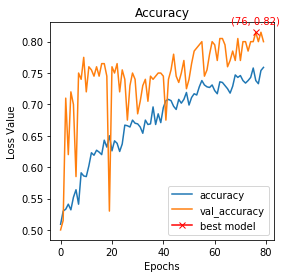

In [29]:
#Settings
img_w, img_h = 128, 128
base = 8
n_epochs = 80
batchsize = 8
LR = 0.00001

for batchnorm in [True, False]:
    #Build the model
    clf = AlexNet(1, img_w, img_h, base, dropout = True, batchnormal = batchnorm)
    clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
    clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))

    #Plots
    #Loss
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(clf_hist.history["loss"], label="loss")
    plt.plot(clf_hist.history["val_loss"], label="val_loss")
    xmin = np.argmin(clf_hist.history["val_loss"])
    ymin = np.min(clf_hist.history["val_loss"])
    plt.plot( xmin, ymin, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
                 horizontalalignment = "center", verticalalignment = "top", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('1C/loss_'+ str(batchnorm).replace('True', 'with').replace('False', 'without') +'_batchnorm.png', dpi = 200)

    #Accuracy
    plt.figure(figsize=(4, 4))
    plt.title("Accuracy")
    plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
    plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
    xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
    ymax = np.max(clf_hist.history["val_binary_accuracy"])
    plt.plot( xmax, ymax, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('1C/acc_' + str(batchnorm).replace('True', 'with').replace('False', 'without') + '_batchnorm.png', dpi = 200)

# Task 1D

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
batch_normalization_v2_15 (B (None, 128, 128, 8)       32        
_________________________________________________________________
activation_56 (Activation)   (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
batch_normalization_v2_16 (B (None, 64, 64, 16)        64        
_________________________________________________________________
activation_57 (Activation)   (None, 64, 64, 16)       

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3639 - binary_accuracy: 0.8500 - val_loss: 0.4237 - val_binary_accuracy: 0.8250
Epoch 78/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3578 - binary_accuracy: 0.8440 - val_loss: 0.4288 - val_binary_accuracy: 0.8050
Epoch 79/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3378 - binary_accuracy: 0.8490 - val_loss: 0.4242 - val_binary_accuracy: 0.8100
Epoch 80/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3571 - binary_accuracy: 0.8360 - val_loss: 0.4213 - val_binary_accuracy: 0.8150
Epoch 81/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3411 - binary_accuracy: 0.8550 - val_loss: 0.4284 - val_binary_accuracy: 0.8150
Epoch 82/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3413 - binary_accuracy: 0.8490 - val_loss: 0.4201 - val_binary_accuracy: 0.8100
Epoch 83/150
1000/1000 [=================

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6925 - binary_accuracy: 0.5240 - val_loss: 0.6923 - val_binary_accuracy: 0.4950
Epoch 8/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6930 - binary_accuracy: 0.4880 - val_loss: 0.6923 - val_binary_accuracy: 0.4950
Epoch 9/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6925 - binary_accuracy: 0.5260 - val_loss: 0.6920 - val_binary_accuracy: 0.4950
Epoch 10/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6918 - binary_accuracy: 0.5320 - val_loss: 0.6920 - val_binary_accuracy: 0.5000
Epoch 11/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6926 - binary_accuracy: 0.5080 - val_loss: 0.6917 - val_binary_accuracy: 0.5000
Epoch 12/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6921 - binary_accuracy: 0.5160 - val_loss: 0.6915 - val_binary_accuracy: 0.5000
Epoch 13/150
1000/1000 [===================

Epoch 58/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6246 - binary_accuracy: 0.6890 - val_loss: 0.6203 - val_binary_accuracy: 0.7100
Epoch 59/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6328 - binary_accuracy: 0.6620 - val_loss: 0.6162 - val_binary_accuracy: 0.7200
Epoch 60/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6177 - binary_accuracy: 0.6980 - val_loss: 0.6105 - val_binary_accuracy: 0.7400
Epoch 61/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6199 - binary_accuracy: 0.6900 - val_loss: 0.6107 - val_binary_accuracy: 0.7600
Epoch 62/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6182 - binary_accuracy: 0.6840 - val_loss: 0.6172 - val_binary_accuracy: 0.7100
Epoch 63/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6143 - binary_accuracy: 0.6980 - val_loss: 0.6070 - val_binary_accuracy: 0.7500
Epoch 64/150
1000/1000 [====

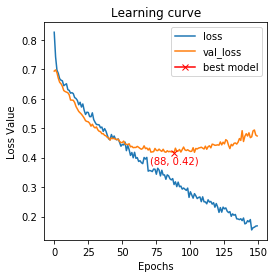

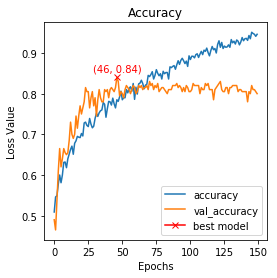

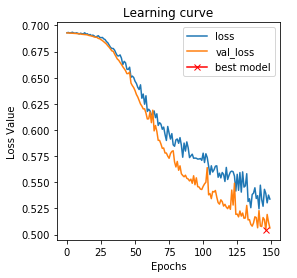

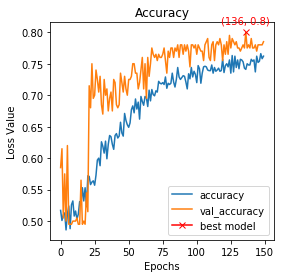

In [30]:
#Settings
img_w, img_h = 128, 128
base = 8
n_epochs = 150
batchsize = 8
LR = 0.00001

for batchnorm in [True, False]:
    #Build the model
    clf = AlexNet(1, img_w, img_h, base, dropout = True, batchnormal = batchnorm)
    clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
    clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))

    #Plots
    #Loss
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(clf_hist.history["loss"], label="loss")
    plt.plot(clf_hist.history["val_loss"], label="val_loss")
    xmin = np.argmin(clf_hist.history["val_loss"])
    ymin = np.min(clf_hist.history["val_loss"])
    plt.plot( xmin, ymin, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
                 horizontalalignment = "center", verticalalignment = "top", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('1D/loss_'+ str(batchnorm).replace('True', 'with').replace('False', 'without') +'_batchnorm.png', dpi = 200)

    #Accuracy
    plt.figure(figsize=(4, 4))
    plt.title("Accuracy")
    plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
    plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
    xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
    ymax = np.max(clf_hist.history["val_binary_accuracy"])
    plt.plot( xmax, ymax, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('1D/acc_' + str(batchnorm).replace('True', 'with').replace('False', 'without') + '_batchnorm.png', dpi = 200)

#### _Comments_

By looking at the loss we can see that the batch normalization speed up the process. Indeed, with the same epochs the loss is smaller with the batch normalization than without. And it converges (for the validation) faster with than without. So this is good to speed up the process but it doesn't increase the performance because in the end it converges to the same loss value.

# Task 2A

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
activation_96 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
spatial_dropout2d_6 (Spatial (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
activation_97 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
spatial_dropout2d_7 (Spatial (None, 64, 64, 64)      

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5978 - binary_accuracy: 0.7060 - val_loss: 0.5450 - val_binary_accuracy: 0.7950
Epoch 78/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5820 - binary_accuracy: 0.7150 - val_loss: 0.5522 - val_binary_accuracy: 0.7350
Epoch 79/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5878 - binary_accuracy: 0.7120 - val_loss: 0.5412 - val_binary_accuracy: 0.8000
Epoch 80/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5796 - binary_accuracy: 0.7120 - val_loss: 0.5375 - val_binary_accuracy: 0.7750
Epoch 81/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5933 - binary_accuracy: 0.7140 - val_loss: 0.5351 - val_binary_accuracy: 0.7900
Epoch 82/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5836 - binary_accuracy: 0.7070 - val_loss: 0.5335 - val_binary_accuracy: 0.7900
Epoch 83/150
1000/1000 [=================

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6913 - binary_accuracy: 0.5410 - val_loss: 0.6902 - val_binary_accuracy: 0.5900
Epoch 8/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6934 - binary_accuracy: 0.5040 - val_loss: 0.6892 - val_binary_accuracy: 0.5050
Epoch 9/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6888 - binary_accuracy: 0.5420 - val_loss: 0.6875 - val_binary_accuracy: 0.7050
Epoch 10/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6895 - binary_accuracy: 0.5410 - val_loss: 0.6860 - val_binary_accuracy: 0.7800
Epoch 11/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6885 - binary_accuracy: 0.5360 - val_loss: 0.6842 - val_binary_accuracy: 0.7700
Epoch 12/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6840 - binary_accuracy: 0.5600 - val_loss: 0.6871 - val_binary_accuracy: 0.5000
Epoch 13/150
1000/1000 [===================

Epoch 58/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5205 - binary_accuracy: 0.7690 - val_loss: 0.4725 - val_binary_accuracy: 0.8100
Epoch 59/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5148 - binary_accuracy: 0.7650 - val_loss: 0.4827 - val_binary_accuracy: 0.8050
Epoch 60/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5041 - binary_accuracy: 0.7800 - val_loss: 0.4948 - val_binary_accuracy: 0.7900
Epoch 61/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5169 - binary_accuracy: 0.7650 - val_loss: 0.4758 - val_binary_accuracy: 0.8150
Epoch 62/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5176 - binary_accuracy: 0.7660 - val_loss: 0.4812 - val_binary_accuracy: 0.8150
Epoch 63/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5081 - binary_accuracy: 0.7720 - val_loss: 0.4855 - val_binary_accuracy: 0.8050
Epoch 64/150
1000/1000 [====

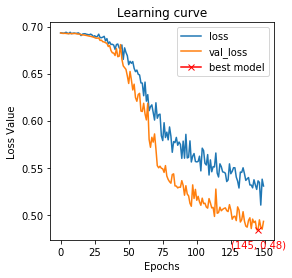

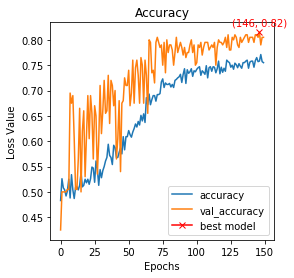

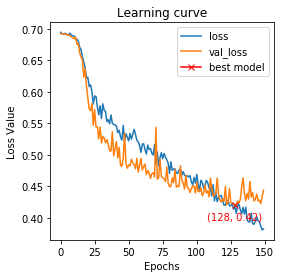

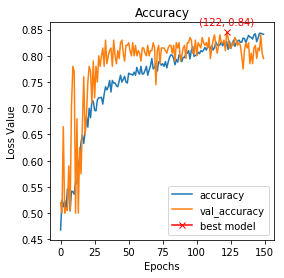

In [36]:
#Settings
img_w, img_h = 128, 128
base = 32
n_epochs = 150
batchsize = 8
LR = 0.00001

for spdrop in [True, False]:
    #Build the model
    clf = AlexNet(1, img_w, img_h, base, dropout = True, batchnormal = False, spatialdrop = spdrop)
    clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
    clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))

    #Plots
    #Loss
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(clf_hist.history["loss"], label="loss")
    plt.plot(clf_hist.history["val_loss"], label="val_loss")
    xmin = np.argmin(clf_hist.history["val_loss"])
    ymin = np.min(clf_hist.history["val_loss"])
    plt.plot( xmin, ymin, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
                 horizontalalignment = "center", verticalalignment = "top", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('2A/loss_'+ str(spdrop).replace('True', 'with').replace('False', 'without') +'_spatialdrop.png', dpi = 200)

    #Accuracy
    plt.figure(figsize=(4, 4))
    plt.title("Accuracy")
    plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
    plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
    xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
    ymax = np.max(clf_hist.history["val_binary_accuracy"])
    plt.plot( xmax, ymax, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('2A/acc_' + str(spdrop).replace('True', 'with').replace('False', 'without') + '_spatialdrop.png', dpi = 200)

# Task 2B

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
activation_112 (Activation)  (None, 128, 128, 32)      0         
_________________________________________________________________
spatial_dropout2d_11 (Spatia (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
activation_113 (Activation)  (None, 64, 64, 64)        0         
_________________________________________________________________
spatial_dropout2d_12 (Spatia (None, 64, 64, 64)      

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6685 - binary_accuracy: 0.6100 - val_loss: 0.6476 - val_binary_accuracy: 0.6700
Epoch 78/250
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6679 - binary_accuracy: 0.5940 - val_loss: 0.6409 - val_binary_accuracy: 0.6900
Epoch 79/250
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6574 - binary_accuracy: 0.6410 - val_loss: 0.6372 - val_binary_accuracy: 0.7550
Epoch 80/250
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6638 - binary_accuracy: 0.6220 - val_loss: 0.6396 - val_binary_accuracy: 0.6900
Epoch 81/250
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6640 - binary_accuracy: 0.6310 - val_loss: 0.6377 - val_binary_accuracy: 0.6900
Epoch 82/250
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6542 - binary_accuracy: 0.6230 - val_loss: 0.6409 - val_binary_accuracy: 0.6600
Epoch 83/250
1000/1000 [=================

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5291 - binary_accuracy: 0.7510 - val_loss: 0.4998 - val_binary_accuracy: 0.7950
Epoch 178/250
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5393 - binary_accuracy: 0.7660 - val_loss: 0.4938 - val_binary_accuracy: 0.7900
Epoch 179/250
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5367 - binary_accuracy: 0.7460 - val_loss: 0.5000 - val_binary_accuracy: 0.7950
Epoch 180/250
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5259 - binary_accuracy: 0.7650 - val_loss: 0.5026 - val_binary_accuracy: 0.7850
Epoch 181/250
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5385 - binary_accuracy: 0.7490 - val_loss: 0.5160 - val_binary_accuracy: 0.7400
Epoch 182/250
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5298 - binary_accuracy: 0.7660 - val_loss: 0.4964 - val_binary_accuracy: 0.7900
Epoch 183/250
1000/1000 [===========

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6920 - binary_accuracy: 0.5210 - val_loss: 0.6903 - val_binary_accuracy: 0.6250
Epoch 8/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6899 - binary_accuracy: 0.5560 - val_loss: 0.6901 - val_binary_accuracy: 0.5000
Epoch 9/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6889 - binary_accuracy: 0.5560 - val_loss: 0.6873 - val_binary_accuracy: 0.6550
Epoch 10/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6882 - binary_accuracy: 0.5590 - val_loss: 0.6852 - val_binary_accuracy: 0.5000
Epoch 11/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6833 - binary_accuracy: 0.5960 - val_loss: 0.6815 - val_binary_accuracy: 0.5100
Epoch 12/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6795 - binary_accuracy: 0.5870 - val_loss: 0.6784 - val_binary_accuracy: 0.6200
Epoch 13/250
1000/1000 [===================

Epoch 58/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5319 - binary_accuracy: 0.7610 - val_loss: 0.5122 - val_binary_accuracy: 0.7750
Epoch 59/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5225 - binary_accuracy: 0.7550 - val_loss: 0.4772 - val_binary_accuracy: 0.8250
Epoch 60/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5286 - binary_accuracy: 0.7560 - val_loss: 0.4876 - val_binary_accuracy: 0.8100
Epoch 61/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5169 - binary_accuracy: 0.7650 - val_loss: 0.4742 - val_binary_accuracy: 0.8100
Epoch 62/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5153 - binary_accuracy: 0.7630 - val_loss: 0.5294 - val_binary_accuracy: 0.7350
Epoch 63/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5213 - binary_accuracy: 0.7620 - val_loss: 0.4731 - val_binary_accuracy: 0.8100
Epoch 64/250
1000/1000 [====

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4200 - binary_accuracy: 0.8140 - val_loss: 0.4683 - val_binary_accuracy: 0.7850
Epoch 159/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4185 - binary_accuracy: 0.8130 - val_loss: 0.4497 - val_binary_accuracy: 0.8300
Epoch 160/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4324 - binary_accuracy: 0.8290 - val_loss: 0.4392 - val_binary_accuracy: 0.8250
Epoch 161/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4200 - binary_accuracy: 0.8190 - val_loss: 0.4509 - val_binary_accuracy: 0.8150
Epoch 162/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4281 - binary_accuracy: 0.8180 - val_loss: 0.4455 - val_binary_accuracy: 0.8300
Epoch 163/250
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4161 - binary_accuracy: 0.8270 - val_loss: 0.4399 - val_binary_accuracy: 0.8300
Epoch 164/250
1000/1000 [===========

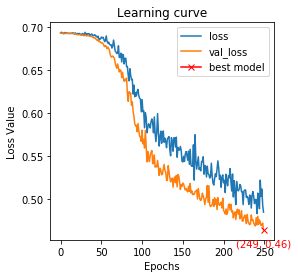

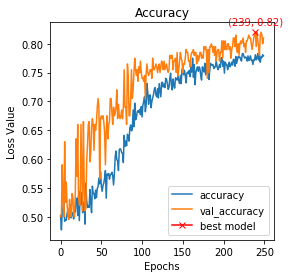

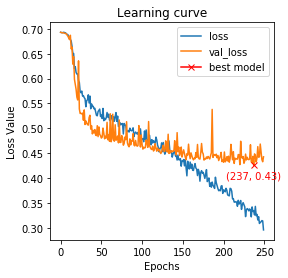

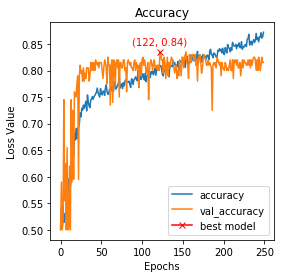

In [38]:
#Settings
img_w, img_h = 128, 128
base = 32
n_epochs = 250
batchsize = 8
LR = 0.00001

for spdrop in [True, False]:
    #Build the model
    clf = AlexNet(1, img_w, img_h, base, dropout = True, batchnormal = False, spatialdrop = spdrop)
    clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
    clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))

    #Plots
    #Loss
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(clf_hist.history["loss"], label="loss")
    plt.plot(clf_hist.history["val_loss"], label="val_loss")
    xmin = np.argmin(clf_hist.history["val_loss"])
    ymin = np.min(clf_hist.history["val_loss"])
    plt.plot( xmin, ymin, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
                 horizontalalignment = "center", verticalalignment = "top", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('2B/loss_'+ str(spdrop).replace('True', 'with').replace('False', 'without') +'_spatialdrop.png', dpi = 200)

    #Accuracy
    plt.figure(figsize=(4, 4))
    plt.title("Accuracy")
    plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
    plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
    xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
    ymax = np.max(clf_hist.history["val_binary_accuracy"])
    plt.plot( xmax, ymax, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('2B/acc_' + str(spdrop).replace('True', 'with').replace('False', 'without') + '_spatialdrop.png', dpi = 200)

# Task 3A

In [2]:
import numpy as np
from skimage.io import imread
from skimage.transform import rescale
from skimage.transform import rotate
from skimage import exposure
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [43]:
sample_dir = '/DL_course_data/Lab1/X_ray/train/C4_4662.jpg'
img = imread(sample_dir)
row, col = img.shape

def show_paired(Original, Transform, Operation):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(Original, cmap='gray')
    ax[0].set_title("Original image")
    ax[1].imshow(Transform, cmap='gray')
    ax[1].set_title(Operation + " image")
    if "Rescaled" in Operation:
        ax[0].set_xlim(0, col)
        ax[0].set_ylim(row, 0)
    else:
        ax[0].axis('off')
        ax[1].axis('off')
    plt.tight_layout()

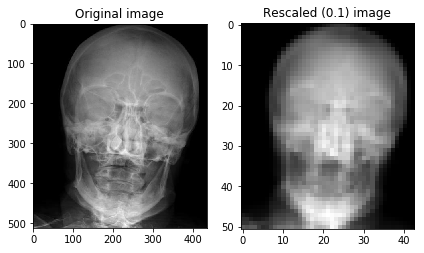

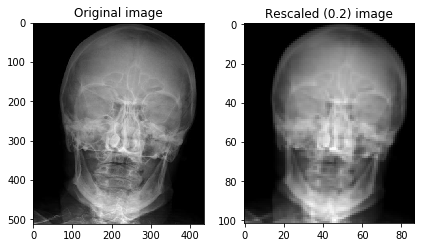

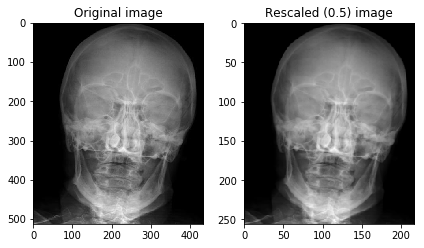

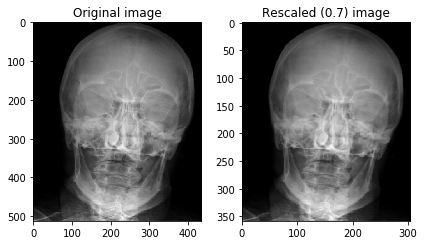

In [44]:
# Scaling
scale_factors = [0.1, 0.2, 0.5, 0.7]
for scale_factor in scale_factors:
    image_rescaled = rescale(img, scale_factor)
    show_paired(img, image_rescaled, "Rescaled (" + str(scale_factor) + ')')

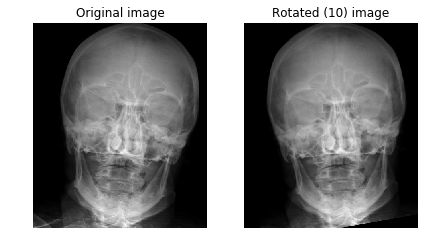

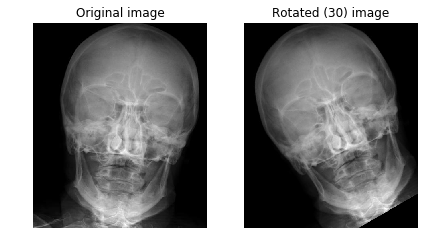

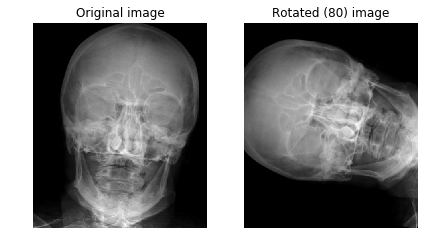

In [45]:
# Rotation
angles = [10, 30, 80]
for angle in angles:
    image_rotated = rotate(img, angle)
    show_paired(img, image_rotated, "Rotated (" + str(angle) + ')')

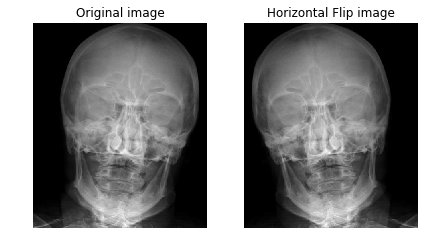

In [46]:
# Horizontal Flip
horizontal_flip = img[:, ::-1]
show_paired(img, horizontal_flip, 'Horizontal Flip')

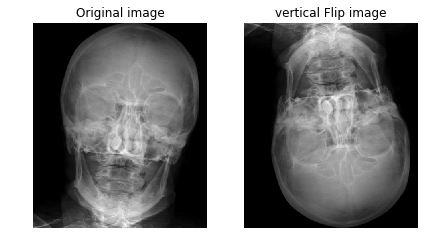

In [47]:
# Vertical flip
vertical_flip = img[::-1, :]
show_paired(img, vertical_flip, 'vertical Flip')

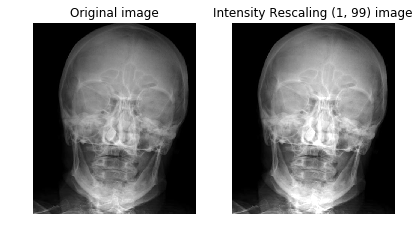

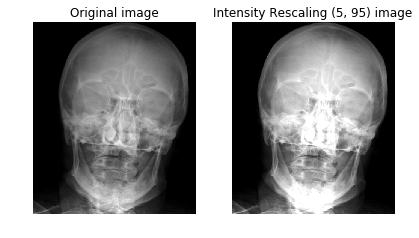

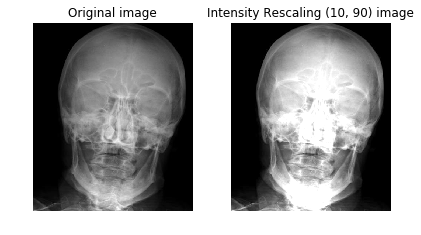

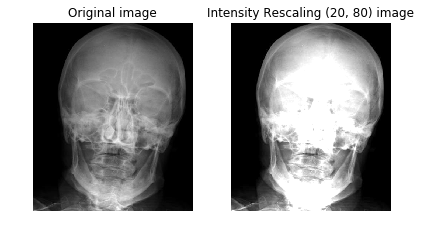

In [50]:
# Intensity rescaling
low_bounds = [1, 5, 10, 20] 
high_bounds = [99, 95, 90, 80]
for low_bound, high_bound in zip(low_bounds, high_bounds):
    min_val, max_val = np.percentile(img, (low_bound, high_bound))
    better_contrast = exposure.rescale_intensity(img, in_range=(min_val, max_val))
    show_paired(img, better_contrast, 'Intensity Rescaling (' + str(low_bound) + ', ' + str(high_bound) +')')

# Task 3B

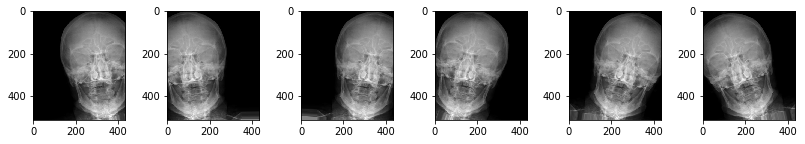

In [3]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

Sample = '/DL_course_data/Lab1/X_ray/train/C4_4662.jpg'
Img = imread(Sample)
Img = np.expand_dims(Img, axis = 2)
Img = np.expand_dims(Img, axis = 0)

count = 5
my_gen = ImageDataGenerator(rotation_range = 20,
                            width_shift_range = 0.2,
                            horizontal_flip = True)

fix, ax = plt.subplots(1,count+1, figsize=(14,2))
images_flow = my_gen.flow(Img, batch_size=1)
for i, new_images in enumerate(images_flow):
    new_image = array_to_img(new_images[0], scale=True)
    ax[i].imshow(new_image,cmap="gray")
    if i >= count:
        break

# Task 4

In [6]:
def AlexNet128(img_ch, img_width, img_height, n_base, dropout = False, batchnormal = False):
    model = Sequential()
    
    model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),kernel_size=(3,3), strides=(1,1), padding='same'))
    if batchnormal :
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    if batchnormal :
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    if batchnormal :
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    if batchnormal :
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    if batchnormal :
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    if dropout:
        model.add(Dropout(0.4))
    model.add(Dense(64))
    model.add(Activation('relu'))
    if dropout:
        model.add(Dropout(0.4))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model

In [11]:
img_w, img_h = 128, 128
base = 64
n_epochs = 80
batchsize = 8
LR = 0.00001

train_dir = '/DL_course_data/Lab2/Skin/train/'
val_dir = '/DL_course_data/Lab2/Skin/validation/'

train_datagen = ImageDataGenerator(rotation_range = 10,
                                   width_shift_range = 0.1,
                                   height_shift_range=0.1,
                                   rescale=1./255,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = batchsize, 
                                                    target_size = (img_w, img_h),
                                                    class_mode = 'binary',
                                                    color_mode = 'grayscale')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(val_dir, batch_size = batchsize,
                                                target_size = (img_w, img_h),
                                                class_mode = 'binary',
                                                color_mode = 'grayscale')

clf = AlexNet128(1, img_w, img_h, base, dropout = True, batchnormal = True)
clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
clf_hist = clf.fit_generator(train_generator, epochs = n_epochs, validation_data=val_generator)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
batch_normalization_v2_10 (B (None, 128, 128, 64)      256       
_________________________________________________________________
activation_16 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
batch_normalization_v2_11 (B (None, 64, 64, 128)       512       
_____________________________________

Epoch 79/80
125/125 [==============================] - 9s 72ms/step - loss: 0.4211 - binary_accuracy: 0.7910 - val_loss: 0.4596 - val_binary_accuracy: 0.8000
Epoch 80/80
125/125 [==============================] - 9s 72ms/step - loss: 0.4329 - binary_accuracy: 0.8030 - val_loss: 0.4517 - val_binary_accuracy: 0.8150


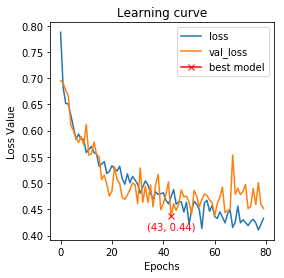

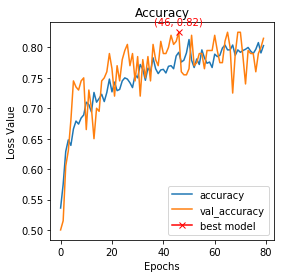

In [12]:
#Plots
#Loss
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
xmin = np.argmin(clf_hist.history["val_loss"])
ymin = np.min(clf_hist.history["val_loss"])
plt.plot( xmin, ymin, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
             horizontalalignment = "center", verticalalignment = "top", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('4/loss_data_augmentation.png', dpi = 200)

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('4/acc_data_augmentation.png', dpi = 200)

# Task 5

In [13]:
def VGG16(img_ch, img_width, img_height, n_base):
    model = Sequential()
    
    model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *8, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
activation_126 (Activation)  (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
activation_127 (Activation)  (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 64, 64, 128)       73856     
_____________________________________

Epoch 17/80
125/125 [==============================] - 8s 67ms/step - loss: 0.5228 - binary_accuracy: 0.7650 - val_loss: 0.5980 - val_binary_accuracy: 0.6450
Epoch 18/80
125/125 [==============================] - 8s 66ms/step - loss: 0.5060 - binary_accuracy: 0.7580 - val_loss: 0.5687 - val_binary_accuracy: 0.7150
Epoch 19/80
125/125 [==============================] - 8s 66ms/step - loss: 0.5157 - binary_accuracy: 0.7640 - val_loss: 0.5492 - val_binary_accuracy: 0.7250
Epoch 20/80
125/125 [==============================] - 8s 64ms/step - loss: 0.5107 - binary_accuracy: 0.7720 - val_loss: 0.5789 - val_binary_accuracy: 0.7600
Epoch 21/80
125/125 [==============================] - 8s 66ms/step - loss: 0.4922 - binary_accuracy: 0.7760 - val_loss: 0.5427 - val_binary_accuracy: 0.7550
Epoch 22/80
125/125 [==============================] - 8s 65ms/step - loss: 0.4824 - binary_accuracy: 0.7720 - val_loss: 0.5004 - val_binary_accuracy: 0.7950
Epoch 23/80
125/125 [==============================]

Epoch 69/80
125/125 [==============================] - 8s 64ms/step - loss: 0.4067 - binary_accuracy: 0.8200 - val_loss: 0.4961 - val_binary_accuracy: 0.7950
Epoch 70/80
125/125 [==============================] - 8s 66ms/step - loss: 0.3987 - binary_accuracy: 0.8130 - val_loss: 0.4777 - val_binary_accuracy: 0.7650
Epoch 71/80
125/125 [==============================] - 8s 65ms/step - loss: 0.4003 - binary_accuracy: 0.8130 - val_loss: 0.4582 - val_binary_accuracy: 0.7950
Epoch 72/80
125/125 [==============================] - 8s 64ms/step - loss: 0.4068 - binary_accuracy: 0.8090 - val_loss: 0.4439 - val_binary_accuracy: 0.8100
Epoch 73/80
125/125 [==============================] - 8s 65ms/step - loss: 0.3910 - binary_accuracy: 0.8140 - val_loss: 0.4630 - val_binary_accuracy: 0.7900
Epoch 74/80
125/125 [==============================] - 8s 64ms/step - loss: 0.3951 - binary_accuracy: 0.8140 - val_loss: 0.4510 - val_binary_accuracy: 0.7900
Epoch 75/80
125/125 [==============================]

139/139 [==============================] - 106s 761ms/step - loss: 0.6704 - binary_accuracy: 0.5935 - val_loss: 0.7152 - val_binary_accuracy: 0.5000
Epoch 5/80
139/139 [==============================] - 106s 762ms/step - loss: 0.6658 - binary_accuracy: 0.5980 - val_loss: 0.6966 - val_binary_accuracy: 0.5000
Epoch 6/80
139/139 [==============================] - 107s 768ms/step - loss: 0.6681 - binary_accuracy: 0.5962 - val_loss: 0.6850 - val_binary_accuracy: 0.5208
Epoch 7/80
139/139 [==============================] - 106s 766ms/step - loss: 0.6411 - binary_accuracy: 0.6223 - val_loss: 0.4571 - val_binary_accuracy: 0.7812
Epoch 8/80
139/139 [==============================] - 106s 765ms/step - loss: 0.4425 - binary_accuracy: 0.8067 - val_loss: 0.2770 - val_binary_accuracy: 0.9062
Epoch 9/80
139/139 [==============================] - 106s 762ms/step - loss: 0.3218 - binary_accuracy: 0.8606 - val_loss: 0.2666 - val_binary_accuracy: 0.9062
Epoch 10/80
139/139 [==============================

Epoch 55/80
139/139 [==============================] - 107s 766ms/step - loss: 0.1038 - binary_accuracy: 0.9577 - val_loss: 0.1445 - val_binary_accuracy: 0.9479
Epoch 56/80
139/139 [==============================] - 100s 721ms/step - loss: 0.0554 - binary_accuracy: 0.9820 - val_loss: 0.1880 - val_binary_accuracy: 0.9583
Epoch 57/80
139/139 [==============================] - 107s 766ms/step - loss: 0.0989 - binary_accuracy: 0.9667 - val_loss: 0.3002 - val_binary_accuracy: 0.8958
Epoch 58/80
139/139 [==============================] - 106s 764ms/step - loss: 0.0956 - binary_accuracy: 0.9658 - val_loss: 0.2502 - val_binary_accuracy: 0.9375
Epoch 59/80
139/139 [==============================] - 107s 768ms/step - loss: 0.1042 - binary_accuracy: 0.9586 - val_loss: 0.2045 - val_binary_accuracy: 0.9271
Epoch 60/80
139/139 [==============================] - 106s 762ms/step - loss: 0.0757 - binary_accuracy: 0.9676 - val_loss: 0.3531 - val_binary_accuracy: 0.8958
Epoch 61/80
139/139 [=============

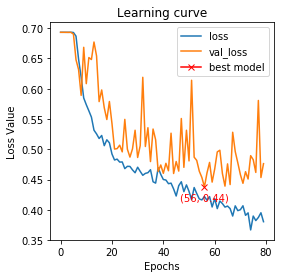

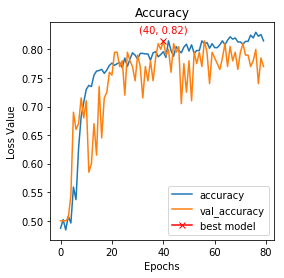

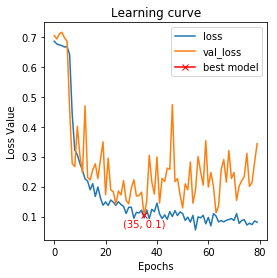

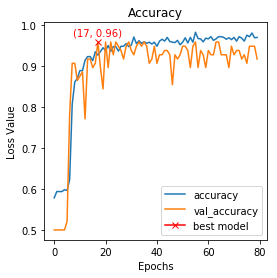

In [18]:
img_w, img_h = 128, 128
base = 64
n_epochs = 80
batchsize = 8
LR = 0.00001

for dataset in ['Skin', 'Bone']:
    train_dir = '/DL_course_data/Lab2/'+ dataset +'/train/'
    val_dir = '/DL_course_data/Lab2/' + dataset + '/validation/'

    train_datagen = ImageDataGenerator(rotation_range = 10,
                                       width_shift_range = 0.1,
                                       height_shift_range=0.1,
                                       rescale=1./255,
                                       horizontal_flip=True)
    train_generator = train_datagen.flow_from_directory(train_dir, batch_size = batchsize, 
                                                        target_size = (img_w, img_h),
                                                        class_mode = 'binary',
                                                        color_mode = 'grayscale')

    val_datagen = ImageDataGenerator(rescale=1./255)
    val_generator = val_datagen.flow_from_directory(val_dir, batch_size = batchsize,
                                                    target_size = (img_w, img_h),
                                                    class_mode = 'binary',
                                                    color_mode = 'grayscale')

    clf = VGG16(1, img_w, img_h, base)
    clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
    clf_hist = clf.fit_generator(train_generator, epochs = n_epochs, validation_data=val_generator)
    
    #Plots
    #Loss
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(clf_hist.history["loss"], label="loss")
    plt.plot(clf_hist.history["val_loss"], label="val_loss")
    xmin = np.argmin(clf_hist.history["val_loss"])
    ymin = np.min(clf_hist.history["val_loss"])
    plt.plot( xmin, ymin, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmin) + ', '+ str(round(ymin, 2)) + ')', xy = (xmin, ymin - 0.01),
                 horizontalalignment = "center", verticalalignment = "top", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('5/loss_data_augmentation_' + dataset + '.png', dpi = 200)

    #Accuracy
    plt.figure(figsize=(4, 4))
    plt.title("Accuracy")
    plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
    plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
    xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
    ymax = np.max(clf_hist.history["val_binary_accuracy"])
    plt.plot( xmax, ymax, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('5/acc_data_augmentation_' + dataset + '.png', dpi = 200)